### How does a playlist’s genre diversity affect its popularity?

In [4]:
import os
import json
import pickle
from collections import defaultdict
from collections import Counter
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [5]:
with open('mappings/Q1/playlist_dataMULTIPLE.pkl', 'rb') as fp:
    playlist_data = pickle.load(fp)

In [65]:
# cityblock 0, euclidean 1, braycurtis 2, cosine 3, minkowski 4, canberra 5
KEY = 0

In [66]:
# list(playlist_data.items())[:5]

In [67]:
div = np.asarray([np.asarray([x[1][0][KEY], x[1][1]]) for x in playlist_data.items()])

In [68]:
div.shape

(409039, 2)

In [69]:
LOW = np.min(div[:,0])
MAX = np.max(div[:,0])
num_bins = 10
w = (MAX-LOW)/num_bins
print(LOW,MAX,w)

1.9047109207708781 1.9996431120628144 0.00949321912919363


### Explore Diversity Metric

Text(0.5, 1.0, '# Playlists in Each Diversity Score')

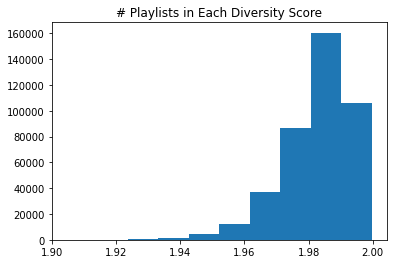

In [70]:
plt.hist(div[:,0])
plt.title('# Playlists in Each Diversity Score')

### Regression on f>1

In [71]:
mask = [x[1] > 1 for x in div]
data = div[mask]

Text(0.5, 1.0, '# Playlists (f>1) in Each Diversity Score')

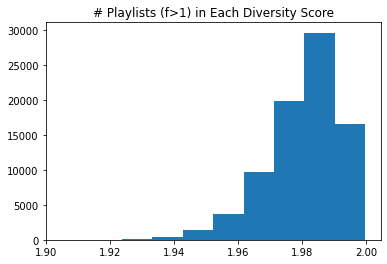

In [72]:
plt.hist(data[:,0])
plt.title('# Playlists (f>1) in Each Diversity Score')

Text(0.5, 1.0, 'Followers vs Diversity')

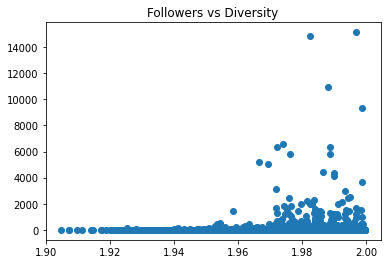

In [73]:
plt.scatter(data[:,0], data[:,1])
plt.title('Followers vs Diversity')

In [74]:
np.max(data[:,1])

15123.0

In [75]:
frs = data[:,1]

In [76]:
np.quantile(frs, 0.999)

538.6000000000495

In [77]:
mask2 = [x[1] < 5712 for x in data]
data_adj = data[mask2]

In [78]:
len(data_adj)

81192

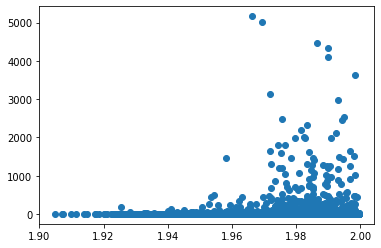

In [79]:
plt.scatter(data_adj[:,0], data_adj[:,1])

(array([6.0000e+00, 1.4000e+01, 1.0300e+02, 3.8800e+02, 1.3640e+03,
        3.6650e+03, 9.7090e+03, 1.9833e+04, 2.9618e+04, 1.6492e+04]),
 array([1.90471092, 1.91420414, 1.92369736, 1.93319058, 1.9426838 ,
        1.95217702, 1.96167024, 1.97116345, 1.98065667, 1.99014989,
        1.99964311]),
 <BarContainer object of 10 artists>)

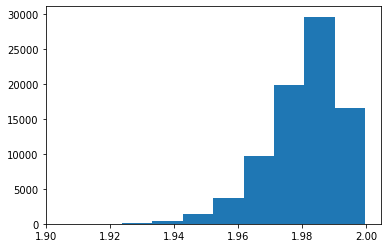

In [80]:
plt.hist(data_adj[:,0])

In [81]:
np.min(data_adj[:,1])

2.0

In [82]:
def msk(a,b, ix=1):
    m = [a <= x[ix] and x[ix] <= b for x in div]
    print(len(div[m]))
    data = div[m]
    return data

In [83]:
d = msk(10,50)

1553


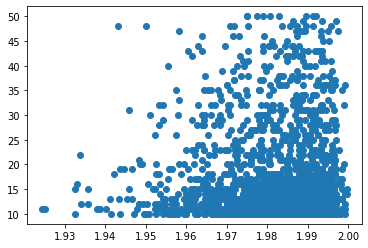

In [84]:
plt.scatter(d[:,0], d[:,1])

In [85]:
def selector(a=np.min(div[:,1]),b=np.max(div[:,1]),c=np.min(div[:,0]),d=np.max(div[:,0])):
    m = [a <= x[1] and x[1] < b and c <= x[0] and x[0] < d for x in div]
    print(len(div[m]))
    data = div[m]
    return data

614


(0.051431562118780895, 0.20313540935065796)

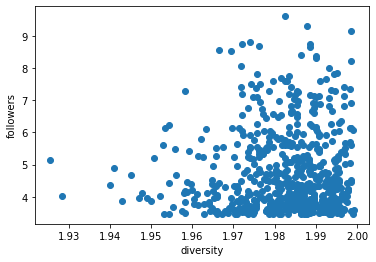

In [86]:

d = selector(a=32)
plt.scatter(d[:,0], np.log(d[:,1]))
plt.ylabel('followers')
plt.xlabel('diversity')
stats.pearsonr(d[:,0], np.log(d[:,1]))

### Playing with Regression

In [87]:
d = selector(a=40)
x = d[:,0]
y = d[:,1]
res = stats.linregress(x,y)

512


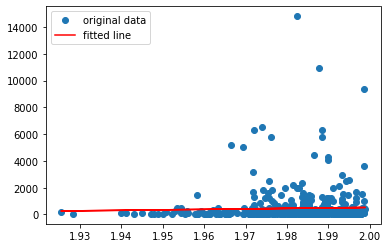

In [88]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [89]:
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.001143


### Regression and ANOVA on subsections

6
1.9047109207708781 1.9142041399000718
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                 -0.162
Method:                 Least Squares   F-statistic:                    0.3033
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.611
Time:                        03:04:01   Log-Likelihood:                -13.935
No. Observations:                   6   AIC:                             31.87
Df Residuals:                       4   BIC:                             31.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

/home/milen/GitHub/proj/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


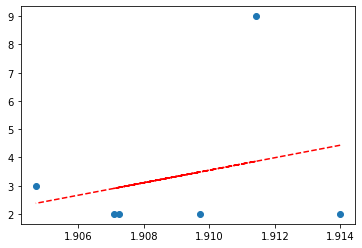

14
1.9142041399000718 1.9236973590292654
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.080
Method:                 Least Squares   F-statistic:                   0.03854
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.848
Time:                        03:04:02   Log-Likelihood:                -31.795
No. Observations:                  14   AIC:                             67.59
Df Residuals:                      12   BIC:                             68.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

/home/milen/GitHub/proj/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


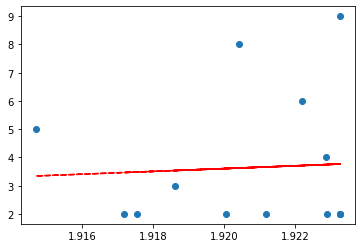

103
1.9236973590292654 1.933190578158459
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.367
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.127
Time:                        03:04:02   Log-Likelihood:                -439.46
No. Observations:                 103   AIC:                             882.9
Df Residuals:                     101   BIC:                             888.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

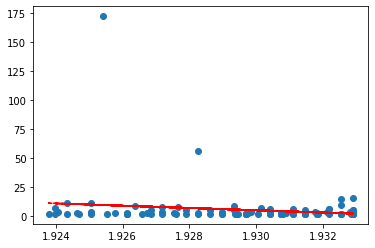

388
1.933190578158459 1.9426837972876527
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6700
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.414
Time:                        03:04:02   Log-Likelihood:                -1354.5
No. Observations:                 388   AIC:                             2713.
Df Residuals:                     386   BIC:                             2721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

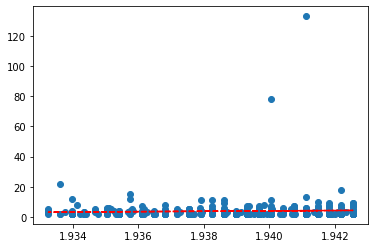

1364
1.9426837972876527 1.9521770164168464
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2808
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.596
Time:                        03:04:03   Log-Likelihood:                -4556.6
No. Observations:                1364   AIC:                             9117.
Df Residuals:                    1362   BIC:                             9128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

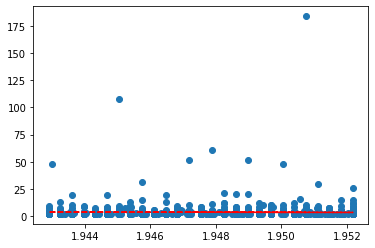

3665
1.9521770164168464 1.96167023554604
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7790
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.378
Time:                        03:04:03   Log-Likelihood:                -17437.
No. Observations:                3665   AIC:                         3.488e+04
Df Residuals:                    3663   BIC:                         3.489e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

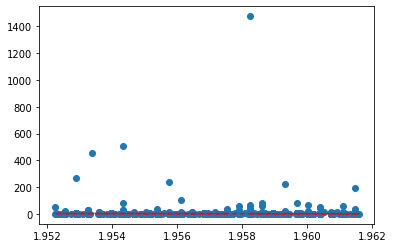

9709
1.96167023554604 1.9711634546752337
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04814
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.826
Time:                        03:04:04   Log-Likelihood:                -55531.
No. Observations:                9709   AIC:                         1.111e+05
Df Residuals:                    9707   BIC:                         1.111e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

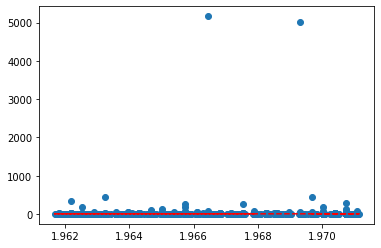

19836
1.9711634546752337 1.9806566738044273
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.008
Date:                Tue, 19 Apr 2022   Prob (F-statistic):             0.0252
Time:                        03:04:04   Log-Likelihood:            -1.1752e+05
No. Observations:               19836   AIC:                         2.350e+05
Df Residuals:                   19834   BIC:                         2.351e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

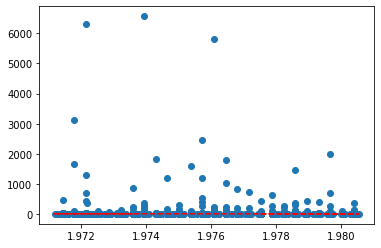

29622
1.9806566738044273 1.990149892933621
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9396
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.332
Time:                        03:04:05   Log-Likelihood:            -1.8669e+05
No. Observations:               29622   AIC:                         3.734e+05
Df Residuals:                   29620   BIC:                         3.734e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

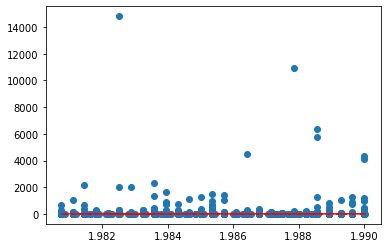

In [90]:
start = LOW
end = start + w
fcutoffa = 2
while end <= MAX:
    d = selector(a=fcutoffa, c=start, d=end)
    x = d[:,0]
    y = d[:,1]
    x2 = sm.add_constant(x)
    lr = sm.OLS(y, x2).fit()
    print(start, end)
    print(lr.summary())
    plt.scatter(x,y)
    c,b = lr.params
    plt.plot(x, c + b*x, 'r--')
    plt.show()
    start = end
    end += w

6
1.9047109207708781 1.9142041399000718
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                 -0.185
Method:                 Least Squares   F-statistic:                    0.2212
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.663
Time:                        03:04:05   Log-Likelihood:                -5.0739
No. Observations:                   6   AIC:                             14.15
Df Residuals:                       4   BIC:                             13.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

/home/milen/GitHub/proj/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


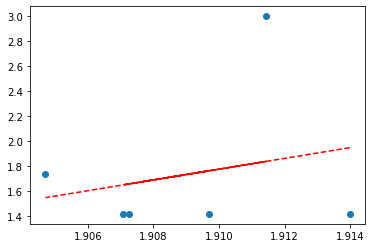

14
1.9142041399000718 1.9236973590292654
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.083
Method:                 Least Squares   F-statistic:                  0.007323
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.933
Time:                        03:04:05   Log-Likelihood:                -11.656
No. Observations:                  14   AIC:                             27.31
Df Residuals:                      12   BIC:                             28.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

/home/milen/GitHub/proj/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


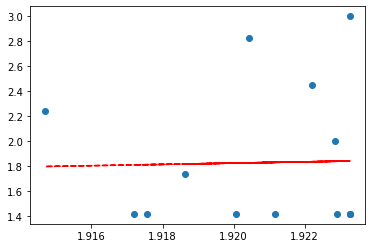

103
1.9236973590292654 1.933190578158459
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.173
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.144
Time:                        03:04:06   Log-Likelihood:                -176.68
No. Observations:                 103   AIC:                             357.4
Df Residuals:                     101   BIC:                             362.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

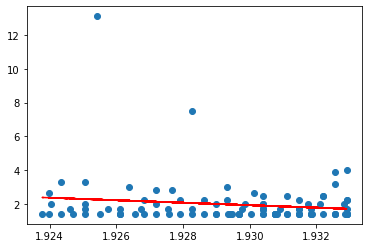

388
1.933190578158459 1.9426837972876527
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4140
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.520
Time:                        03:04:06   Log-Likelihood:                -463.69
No. Observations:                 388   AIC:                             931.4
Df Residuals:                     386   BIC:                             939.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

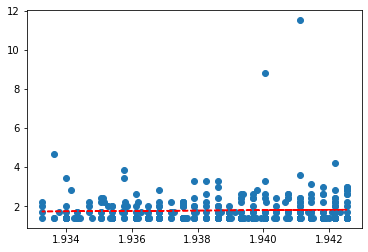

1364
1.9426837972876527 1.9521770164168464
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.204
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.273
Time:                        03:04:07   Log-Likelihood:                -1468.1
No. Observations:                1364   AIC:                             2940.
Df Residuals:                    1362   BIC:                             2951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

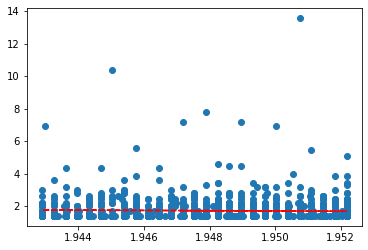

3665
1.9521770164168464 1.96167023554604
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.924
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.165
Time:                        03:04:07   Log-Likelihood:                -5484.4
No. Observations:                3665   AIC:                         1.097e+04
Df Residuals:                    3663   BIC:                         1.099e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

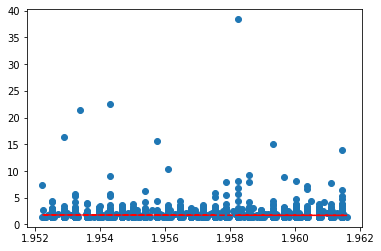

9709
1.96167023554604 1.9711634546752337
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1826
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.669
Time:                        03:04:08   Log-Likelihood:                -15901.
No. Observations:                9709   AIC:                         3.181e+04
Df Residuals:                    9707   BIC:                         3.182e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

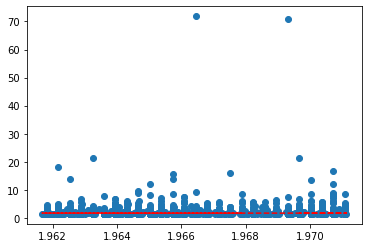

19836
1.9711634546752337 1.9806566738044273
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.728
Date:                Tue, 19 Apr 2022   Prob (F-statistic):             0.0167
Time:                        03:04:08   Log-Likelihood:                -38205.
No. Observations:               19836   AIC:                         7.641e+04
Df Residuals:                   19834   BIC:                         7.643e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

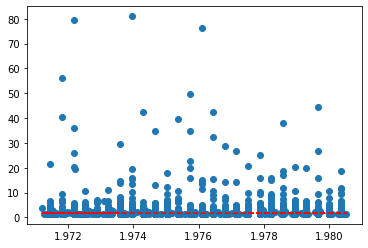

29622
1.9806566738044273 1.990149892933621
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.475
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.224
Time:                        03:04:09   Log-Likelihood:                -60058.
No. Observations:               29622   AIC:                         1.201e+05
Df Residuals:                   29620   BIC:                         1.201e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

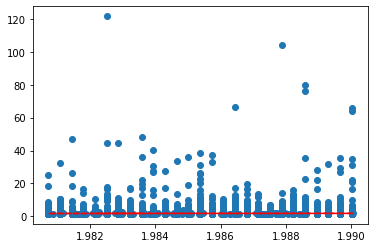

In [91]:
start = LOW
end = start + w
fcutoffa = 2
while end <= MAX:
    d = selector(a=fcutoffa, c=start, d=end)
    x = d[:,0]
    y = np.sqrt(d[:,1])
    x2 = sm.add_constant(x)
    lr = sm.OLS(y, x2).fit()
    print(start, end)
    print(lr.summary())
    plt.scatter(x,y)
    c,b = lr.params
    plt.plot(x, c + b*x, 'r--')
    plt.show()
    start = end
    end += w

In [92]:
# fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
# w = 0.3 # for .3 works, for .2 not???
bins = np.arange(LOW,MAX+w,w)
groups = [selector(a=2, c=s, d=s+w)[:,1] for s in bins[:-1]]

6
14
103
388
1364
3665
9709
19836
29622
16493


In [93]:
stats.alexandergovern(*groups)

AlexanderGovernResult(statistic=33.91728516100331, pvalue=9.235348732225151e-05)

In [94]:
for g in groups:
    print(np.mean(g))

3.3333333333333335
3.642857142857143
5.757281553398058
3.881443298969072
3.5102639296187683
4.18581173260573
4.441343083736739
5.711484170195604
6.295084734319087
6.217183047353423


In [95]:
d = selector(a=2)

81199


(array([  325.,  2327.,  5812., 10299., 13460., 15717., 13651., 10816.,
         6929.,  1863.]),
 array([1.69854713e+16, 5.43544497e+16, 9.17234281e+16, 1.29092407e+17,
        1.66461385e+17, 2.03830363e+17, 2.41199342e+17, 2.78568320e+17,
        3.15937298e+17, 3.53306277e+17, 3.90675255e+17]),
 <BarContainer object of 10 artists>)

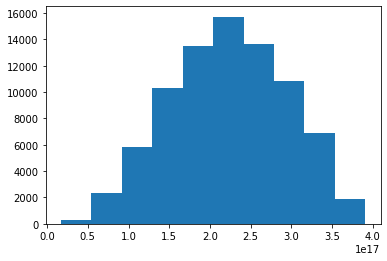

In [96]:
plt.hist(stats.boxcox(d[:,0])[0])

(array([53809.,     0.,     0.,     0.,     0.,     0., 14437.,     0.,
         5387.,  7566.]),
 array([0.31910654, 0.32527427, 0.33144199, 0.33760971, 0.34377743,
        0.34994515, 0.35611287, 0.36228059, 0.36844832, 0.37461604,
        0.38078376]),
 <BarContainer object of 10 artists>)

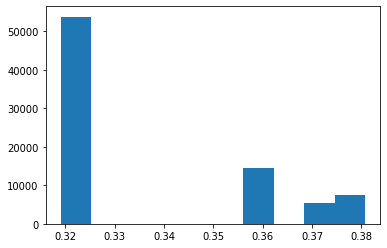

In [97]:
plt.hist(stats.boxcox(d[:,1])[0])

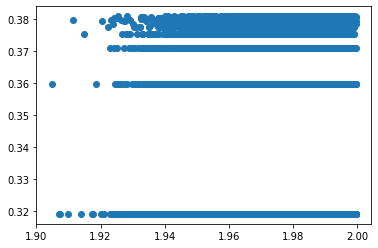

In [98]:
plt.scatter(d[:,0],stats.boxcox(d[:,1])[0])

In [99]:
d = selector(a=40)
x = d[:,0]
y, _ = stats.boxcox(d[:,1])
res = stats.linregress(x,y)

512


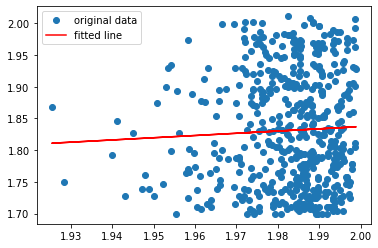

In [100]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [101]:
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.002093


6
1.9047109207708781 1.9142041399000718
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.246
Method:                 Least Squares   F-statistic:                   0.01154
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.920
Time:                        03:04:13   Log-Likelihood:                 12.785
No. Observations:                   6   AIC:                            -21.57
Df Residuals:                       4   BIC:                            -21.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

/home/milen/GitHub/proj/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


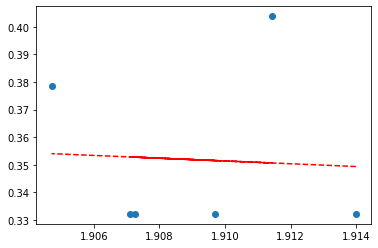

14
1.9142041399000718 1.9236973590292654
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.078
Method:                 Least Squares   F-statistic:                   0.06110
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.809
Time:                        03:04:14   Log-Likelihood:                 12.309
No. Observations:                  14   AIC:                            -20.62
Df Residuals:                      12   BIC:                            -19.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

/home/milen/GitHub/proj/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


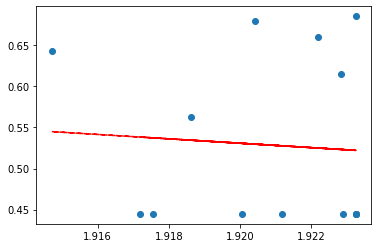

103
1.9236973590292654 1.933190578158459
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6314
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.429
Time:                        03:04:14   Log-Likelihood:                 76.471
No. Observations:                 103   AIC:                            -148.9
Df Residuals:                     101   BIC:                            -143.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

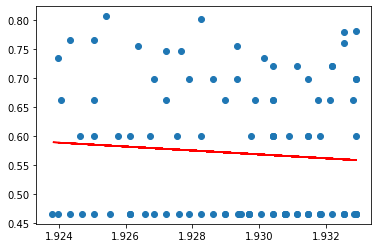

388
1.933190578158459 1.9426837972876527
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1052
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.746
Time:                        03:04:14   Log-Likelihood:                 455.17
No. Observations:                 388   AIC:                            -906.3
Df Residuals:                     386   BIC:                            -898.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

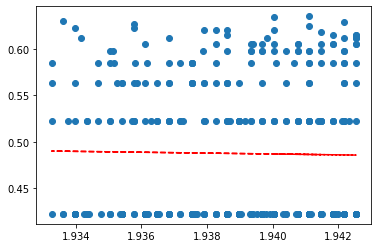

1364
1.9426837972876527 1.9521770164168464
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7316
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.393
Time:                        03:04:15   Log-Likelihood:                 2155.6
No. Observations:                1364   AIC:                            -4307.
Df Residuals:                    1362   BIC:                            -4297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

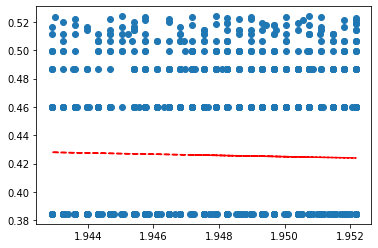

3665
1.9521770164168464 1.96167023554604
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4474
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.504
Time:                        03:04:15   Log-Likelihood:                 6263.2
No. Observations:                3665   AIC:                        -1.252e+04
Df Residuals:                    3663   BIC:                        -1.251e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

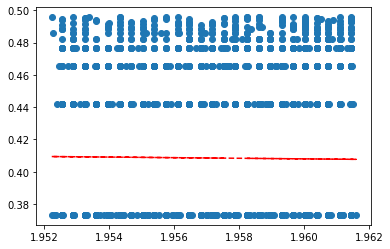

9709
1.96167023554604 1.9711634546752337
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.270
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.260
Time:                        03:04:16   Log-Likelihood:                 19973.
No. Observations:                9709   AIC:                        -3.994e+04
Df Residuals:                    9707   BIC:                        -3.993e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

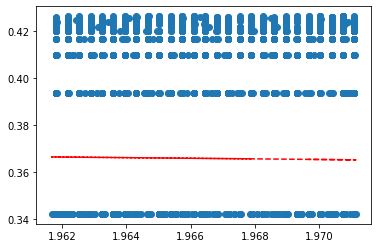

19836
1.9711634546752337 1.9806566738044273
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.736
Date:                Tue, 19 Apr 2022   Prob (F-statistic):             0.0166
Time:                        03:04:16   Log-Likelihood:                 44717.
No. Observations:               19836   AIC:                        -8.943e+04
Df Residuals:                   19834   BIC:                        -8.941e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

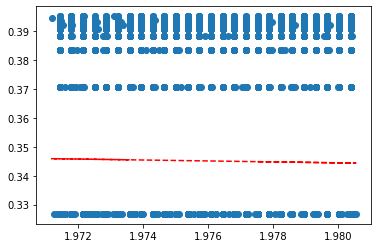

29622
1.9806566738044273 1.990149892933621
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.561
Date:                Tue, 19 Apr 2022   Prob (F-statistic):            0.00344
Time:                        03:04:17   Log-Likelihood:                 77328.
No. Observations:               29622   AIC:                        -1.547e+05
Df Residuals:                   29620   BIC:                        -1.546e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

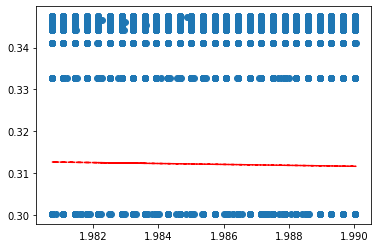

In [102]:
start = LOW
end = start + w
fcutoffa = 2
while end <= MAX:
    d = selector(a=fcutoffa, c=start, d=end)
    x = d[:,0]
    x2 = sm.add_constant(x)
    y, _ = stats.boxcox(d[:,1])
    lr = sm.OLS(y, x2).fit()
    print(start, end)
    print(lr.summary())
    plt.scatter(x,y)
    c,b = lr.params
    plt.plot(x, c + b*x, 'r--')
    plt.show()
    start = end
    end += w

In [103]:
# ANOVA to test means => means different 
# then do linear regression on each group 

In [104]:
lr.params

array([ 0.53171931, -0.1106019 ])